In [1]:
import torch
import numpy as np

# import helper
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Importing the MNIST dataset

In [7]:
from torchvision import datasets, transforms

# Normalixing the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                               ])

# Downloading the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=64)

In [8]:
detaiter = iter(trainloader)
images, labels = detaiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


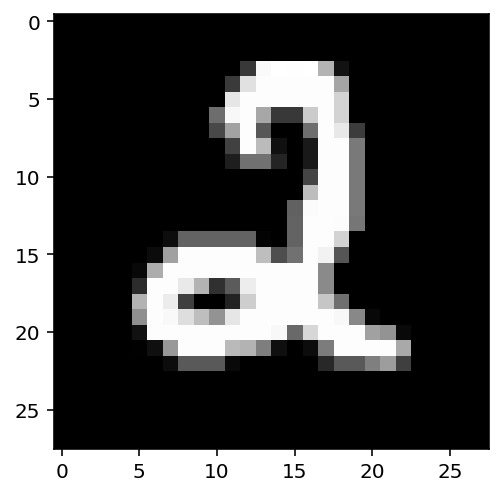

In [9]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

In [13]:
# Activation function
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Flattening the images
img = images.view(images.shape[0], -1)

# Initializing the network parameters
n_input = img.shape[-1]
n_hidden = 256
n_output = 10

# Initializing the weights
W1 = torch.randn((n_input, n_hidden))
W2 = torch.randn((n_hidden, n_output))

# Initializing the Biases
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

h = sigmoid(torch.mm(img, W1) + B1)
out = torch.mm(h, W2) + B2
out.shape

torch.Size([64, 10])

### implementing the softmax function

In [14]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)

prob = softmax(out)

print(prob.shape)
print(torch.sum(prob, dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])
